#Part II: Logistic Regression

In [2]:
import statistics as st
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [69]:
# read csv file
PenguinD = pd.read_table('penguins_size.csv',sep=',')

In [70]:
# main statistics with pandas
print(PenguinD.describe)
print(PenguinD.head)
print(PenguinD.index)
print(PenguinD.columns)
print(PenguinD.dtypes)
print(PenguinD.size)
print(PenguinD.shape)

print("\nMAX\n")
print(PenguinD.max(axis = 0))
print("\nmin\n")
print(PenguinD.min(axis = 0))
print("\nmedian\n")
print(PenguinD.median(axis = 0))
print("\nmean\n")
print(PenguinD.mean(axis = 0))
print("\nstdev\n")
print(PenguinD.std(axis = 0))

<bound method NDFrame.describe of     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     

C:\Users\User\AppData\Local\Temp/ipykernel_15428/400075466.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(PenguinD.max(axis = 0))
C:\Users\User\AppData\Local\Temp/ipykernel_15428/400075466.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(PenguinD.min(axis = 0))
C:\Users\User\AppData\Local\Temp/ipykernel_15428/400075466.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(PenguinD.median(axis = 0))
C:\Users\User\AppData\Local\Temp/ipykernel_15428/400075466.py

In [184]:
print(pd.isnull(PenguinD).sum(axis=0))
PenguinD=PenguinD.dropna()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [185]:
PenguinD['species'] = PenguinD['species'].replace('Adelie', 0).replace('Chinstrap', 1).replace('Gentoo', 2)
PenguinD['island'] = PenguinD['island'].replace('Biscoe', 0).replace('Dream', 1).replace('Torgersen', 2)
PenguinD['sex'] = PenguinD['sex'].replace('FEMALE', 0).replace('MALE', 1).replace('.',0)

PenguinD["species"] = PenguinD["species"].astype("category")
PenguinD["island"] = PenguinD["island"].astype("category")
PenguinD["sex"] = PenguinD["sex"].astype("category")

In [186]:
NpenD = PenguinD
NpenD["culmen_length_mm"] = (NpenD['culmen_length_mm']-min(NpenD['culmen_length_mm']))/((max(NpenD['culmen_length_mm'])-min(NpenD['culmen_length_mm'])))
NpenD["culmen_depth_mm"] = (NpenD['culmen_depth_mm']-min(NpenD['culmen_depth_mm']))/((max(NpenD['culmen_depth_mm'])-min(NpenD['culmen_depth_mm'])))
NpenD["flipper_length_mm"] = (NpenD['flipper_length_mm']-min(NpenD['flipper_length_mm']))/((max(NpenD['flipper_length_mm'])-min(NpenD['flipper_length_mm'])))
NpenD["body_mass_g"] = (NpenD['body_mass_g']-min(NpenD['body_mass_g']))/((max(NpenD['body_mass_g'])-min(NpenD['body_mass_g'])))

In [187]:
# predict which gender a penguin belongs to (female or male)
slice_train = pd.concat([NpenD.iloc[22:140, 0:7], NpenD.iloc[162:270, 0:7], NpenD.iloc[292:, 0:7]]).reset_index(drop=True)
slice_test = pd.concat([NpenD.iloc[0:22, 0:7], NpenD.iloc[140:162, 0:7], NpenD.iloc[270:292, 0:7]]).reset_index(drop=True)

X_train = slice_train.iloc[:, 0:6]
Y_train = slice_train.iloc[:, 6:7]
# # print(y_train)
X_test = slice_test.iloc[:, 0:6]
Y_test = slice_test.iloc[:, 6:7]

In [188]:
# 80% training and 20% testing

# X_train = X.sample(frac=0.8,random_state=1)
# Y_train = Y.sample(frac=0.8,random_state=1)
# X_test = X.drop(X_train.index)
# Y_test = Y.drop(Y_train.index)

print("X_train Y_train X_test Y_test")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

X_train Y_train X_test Y_test
(268, 6) (268, 1) (66, 6) (66, 1)


In [189]:
class LogitRegression(object):
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        w = np.zeros((1, 6))
        b = 0
        loss = []
        for i in range(self.iterations):
            dw, db, cost = self.cost_gradient_descent(w, b, X, y)
            w = w - (self.learning_rate * dw.T)
            b = b - (self.learning_rate * db)
            if i % 100 == 0:
                loss.append(cost)
        return w, b, loss

    def sigmoid(self, z):
        sigmoid_z = 1 / (1 + np.exp(-z))
        return sigmoid_z

    def cost_gradient_descent(self, w, b, X, y):
        y = y.values
        #Define current prediction y_hat for logistic regression
        pred = self.sigmoid(np.dot(X, w.T) + b)
        #Gradient descent is just the derivative of the loss function with respect to its weights
        dw = (1 / X.shape[0]) * (np.dot(X.T, (pred - y)))
        db = (1 / X.shape[0]) * (np.sum(pred - y))
        cost = (-1 / X.shape[0]) * (np.sum((y * np.log(pred)) + ((1 - y) * np.log(1 - pred))))
        return dw, db, cost


    def predict(self, w, b, X, y):
        y = y.values
        y_hat = self.sigmoid(np.dot(X, w.T) + b)
        count = 0

        for i in range(X.shape[0]):
            if y_hat[i] >= 0.5:
                y_hat[i] = 1
            else:
                y_hat[i] = 0

        for i in range(X.shape[0]):
            if y_hat[i] == y[i]:
                count += 1

        accuracy = count / X.shape[0] * 100

        return accuracy

In [193]:
model = LogitRegression(0.001, 10000)

w, b, loss = model.fit(X_train, Y_train)
accuracy = model.predict(w, b, X_test, Y_test)

print(accuracy)
print(loss)

72.72727272727273
[0.6931471805599453, 0.6925046062028347, 0.6918863978845987, 0.6912890273183663, 0.6907095051604725, 0.6901452985067643, 0.6895942609707201, 0.6890545734452646, 0.6885246939295047, 0.6880033150421176, 0.687489328049448, 0.6869817924128783, 0.6864799100107024, 0.6859830033180756, 0.6854904969378078, 0.6850019019675402, 0.6845168027675927, 0.6840348457605678, 0.6835557299504124, 0.683079198896612, 0.6826050339198186, 0.6821330483496106, 0.6816630826542, 0.6811950003165441, 0.6807286843421755, 0.6802640343016992, 0.6798009638258488, 0.6793393984836084, 0.6788792739846085, 0.678420534656034, 0.6779631321519376, 0.6775070243593209, 0.6770521744708276, 0.6765985501985148, 0.6761461231071029, 0.6756948680484107, 0.6752447626814974, 0.6747957870654041, 0.6743479233133999, 0.6739011552993415, 0.6734554684081898, 0.6730108493239524, 0.6725672858493479, 0.6721247667523643, 0.671683281635621, 0.6712428208250708, 0.67080337527511, 0.6703649364876081, 0.6699274964427541, 0.66949104

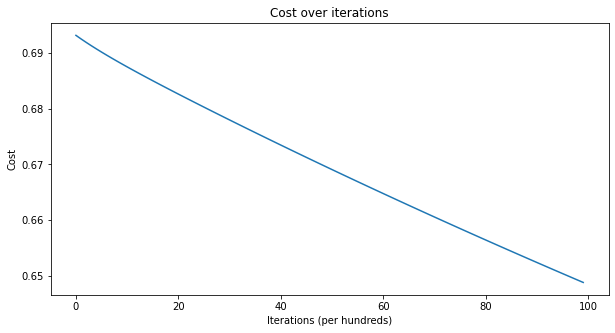

In [194]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(loss)
ax.set_title('Cost over iterations')
ax.set_xlabel('Iterations (per hundreds)')
ax.set_ylabel('Cost')
plt.show()